Source: https://aschinchon.wordpress.com/2014/10/13/beautiful-curves-the-harmonograph/

In [1]:
import re
import pandas as pd

import numpy as np
import math
import serial
import pygame
import time
from pygame.locals import QUIT

import matplotlib.pyplot as plt

import shapes

%matplotlib inline

Create the harmanograph

In [2]:
# define trajectories
def xt(t):
    return np.exp(-d1*t)*np.sin(t*f1+p1)+np.exp(-d2*t)*np.sin(t*f2+p2)

def yt(t):
    return np.exp(-d3*t)*np.sin(t*f3+p3)+np.exp(-d4*t)*np.sin(t*f4+p4)

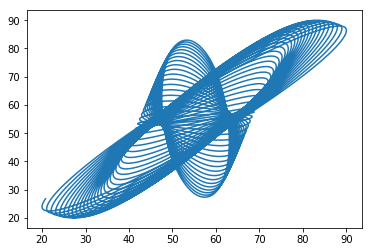

In [21]:
# draw the necessary random numbers
f1, f2, f3, f4 = np.random.randint(2, 4, size=4) + (np.random.random(size=4)-0.5) / 10
d1, d2, d3, d4 = np.random.uniform(0, 1e-02, 4)
p1, p2, p3, p4 = np.random.uniform(0, np.pi, 4)

# define the space and follow the trajectory
t = np.linspace(1, 100, num = 10**4)
xs = xt(t)
ys = yt(t)

# rescaling to fit on a piece of paper
xs = (xs - min(xs))
ys = (ys - min(ys))
xs = xs * 70 / max(xs) + 20
ys = ys * 70 / max(ys) + 20

# show result
plt.plot(xs, ys)

Define the harmanograph in terms of points and lines

In [22]:
pts = [shapes.Point(xs[0], ys[0])] + \
  [shapes.Line(shapes.Point(xs[i], ys[i]), shapes.Point(xs[i+1], ys[i+1])) for i in range(len(xs)-1)]

Define functions for sending the result to the plotter

In [23]:
def preview_objs(objs):
    pygame.init()

    canvas=pygame.display.set_mode((240,170),0,32)

    white = (255, 255, 255)
    black = (0, 0, 0)

    canvas.fill(white)

    for obj in objs:
        obj.draw(canvas, black)

    while True:
        for event in pygame.event.get():
            if event.type==QUIT:
                pygame.quit()
                return
        pygame.display.update()

def wake_up_serial(port, baud):
    # Open grbl serial port
    s = serial.Serial(port, baud)

    # Wake up grbl
    s.write(b"\r\n\r\n")
    time.sleep(3)   # Wait for grbl to initialize 
    s.flushInput()  # Flush startup text in serial input

    s.write(b"G21\n")   # units = mm
    print(s.readline().strip())
    s.write(b"F10000\n") # feed rate
    print(s.readline().strip())

    s.write(b"S0 M3\n") # pen slightly down
    print(s.readline().strip())

    s.write(b"S0 M5\n") # pen up
    print(s.readline().strip())
    
    return s

def objs_to_plotter(objs, s):
    # display objects and ask for confirmation
    preview_objs(objs)
    r = input("plot this? [y/N]")
    if r != "y":
        return
    
    # if response was 'y', plot it
    for obj in objs:
        for line in obj.plot_instructions():
            l = line + "\n"
            print('Sending: ' + l,)
            s.write(l.encode('utf-8')) # Send g-code block to grbl
            grbl_out = s.readline() # Wait for grbl response with carriage return
            print(grbl_out.strip())

Send instructions to plotter

In [28]:
s = wake_up_serial('/dev/tty.wchusbserial1410', 115200)

b'ok'
b'ok'
b'ok'
b'ok'


In [29]:
objs_to_plotter(pts, s)

s.write(b"S0 M5\n") # pen up
print(s.readline())

plot this? [y/N]y
Sending: S0 M5

b'ok'
Sending: G01 X-20.80133 Y26.77948

b'ok'
Sending: S1000 M3

b'ok'
Sending: G01 X-20.59378 Y26.30976

b'ok'
Sending: G01 X-20.41706 Y25.86532

b'ok'
Sending: G01 X-20.27131 Y25.44655

b'ok'
Sending: G01 X-20.15665 Y25.05383

b'ok'
Sending: G01 X-20.07317 Y24.68752

b'ok'
Sending: G01 X-20.02094 Y24.34795

b'ok'
Sending: G01 X-20.0 Y24.03542

b'ok'
Sending: G01 X-20.01035 Y23.75023

b'ok'
Sending: G01 X-20.05199 Y23.49262

b'ok'
Sending: G01 X-20.12485 Y23.26284

b'ok'
Sending: G01 X-20.22887 Y23.0611

b'ok'
Sending: G01 X-20.36395 Y22.88758

b'ok'
Sending: G01 X-20.52995 Y22.74244

b'ok'
Sending: G01 X-20.72673 Y22.62582

b'ok'
Sending: G01 X-20.95409 Y22.53783

b'ok'
Sending: G01 X-21.21183 Y22.47856

b'ok'
Sending: G01 X-21.49972 Y22.44807

b'ok'
Sending: G01 X-21.81747 Y22.44638

b'ok'
Sending: G01 X-22.16482 Y22.47352

b'ok'
Sending: G01 X-22.54143 Y22.52946

b'ok'
Sending: G01 X-22.94697 Y22.61416

b'ok'
Sending: G01 X-23.38106 Y22.72755

b'o

b'ok'
Sending: G01 X-24.92549 Y31.59038

b'ok'
Sending: G01 X-24.46806 Y30.89444

b'ok'
Sending: G01 X-24.03808 Y30.2197

b'ok'
Sending: G01 X-23.63595 Y29.56675

b'ok'
Sending: G01 X-23.26199 Y28.93617

b'ok'
Sending: G01 X-22.91654 Y28.32854

b'ok'
Sending: G01 X-22.5999 Y27.74439

b'ok'
Sending: G01 X-22.31233 Y27.18424

b'ok'
Sending: G01 X-22.05409 Y26.64859

b'ok'
Sending: G01 X-21.8254 Y26.13793

b'ok'
Sending: G01 X-21.62644 Y25.65272

b'ok'
Sending: G01 X-21.45739 Y25.19338

b'ok'
Sending: G01 X-21.31839 Y24.76034

b'ok'
Sending: G01 X-21.20955 Y24.35397

b'ok'
Sending: G01 X-21.13097 Y23.97466

b'ok'
Sending: G01 X-21.08269 Y23.62273

b'ok'
Sending: G01 X-21.06476 Y23.2985

b'ok'
Sending: G01 X-21.07718 Y23.00227

b'ok'
Sending: G01 X-21.11994 Y22.73431

b'ok'
Sending: G01 X-21.19298 Y22.49486

b'ok'
Sending: G01 X-21.29624 Y22.28414

b'ok'
Sending: G01 X-21.42961 Y22.10234

b'ok'
Sending: G01 X-21.59296 Y21.94962

b'ok'
Sending: G01 X-21.78615 Y21.82614

b'ok'
Sending: G01 X

b'ok'
Sending: G01 X-31.59179 Y39.39177

b'ok'
Sending: G01 X-30.90878 Y38.50116

b'ok'
Sending: G01 X-30.24759 Y37.625

b'ok'
Sending: G01 X-29.6088 Y36.76407

b'ok'
Sending: G01 X-28.99296 Y35.91914

b'ok'
Sending: G01 X-28.40061 Y35.09096

b'ok'
Sending: G01 X-27.83228 Y34.28027

b'ok'
Sending: G01 X-27.28847 Y33.48778

b'ok'
Sending: G01 X-26.76964 Y32.71421

b'ok'
Sending: G01 X-26.27625 Y31.96024

b'ok'
Sending: G01 X-25.80873 Y31.22654

b'ok'
Sending: G01 X-25.36749 Y30.51377

b'ok'
Sending: G01 X-24.95291 Y29.82256

b'ok'
Sending: G01 X-24.56535 Y29.15352

b'ok'
Sending: G01 X-24.20515 Y28.50726

b'ok'
Sending: G01 X-23.87262 Y27.88435

b'ok'
Sending: G01 X-23.56805 Y27.28534

b'ok'
Sending: G01 X-23.29169 Y26.71077

b'ok'
Sending: G01 X-23.04379 Y26.16115

b'ok'
Sending: G01 X-22.82456 Y25.63698

b'ok'
Sending: G01 X-22.63418 Y25.13871

b'ok'
Sending: G01 X-22.47282 Y24.66681

b'ok'
Sending: G01 X-22.3406 Y24.22168

b'ok'
Sending: G01 X-22.23764 Y23.80374

b'ok'
Sending: G01 X

b'ok'
Sending: G01 X-37.41606 Y45.96749

b'ok'
Sending: G01 X-36.62474 Y44.98246

b'ok'
Sending: G01 X-35.85019 Y44.00617

b'ok'
Sending: G01 X-35.0931 Y43.0395

b'ok'
Sending: G01 X-34.35415 Y42.0833

b'ok'
Sending: G01 X-33.63397 Y41.13841

b'ok'
Sending: G01 X-32.9332 Y40.20568

b'ok'
Sending: G01 X-32.25246 Y39.28594

b'ok'
Sending: G01 X-31.59235 Y38.37999

b'ok'
Sending: G01 X-30.95344 Y37.48865

b'ok'
Sending: G01 X-30.3363 Y36.61271

b'ok'
Sending: G01 X-29.74146 Y35.75293

b'ok'
Sending: G01 X-29.16946 Y34.9101

b'ok'
Sending: G01 X-28.62078 Y34.08495

b'ok'
Sending: G01 X-28.09592 Y33.27822

b'ok'
Sending: G01 X-27.59532 Y32.49063

b'ok'
Sending: G01 X-27.11943 Y31.72287

b'ok'
Sending: G01 X-26.66866 Y30.97563

b'ok'
Sending: G01 X-26.24341 Y30.24957

b'ok'
Sending: G01 X-25.84403 Y29.54534

b'ok'
Sending: G01 X-25.47089 Y28.86356

b'ok'
Sending: G01 X-25.1243 Y28.20485

b'ok'
Sending: G01 X-24.80456 Y27.56979

b'ok'
Sending: G01 X-24.51196 Y26.95893

b'ok'
Sending: G01 X-24

b'ok'
Sending: G01 X-45.39166 Y55.22313

b'ok'
Sending: G01 X-44.51129 Y54.18844

b'ok'
Sending: G01 X-43.64073 Y53.15437

b'ok'
Sending: G01 X-42.78074 Y52.12186

b'ok'
Sending: G01 X-41.9321 Y51.09181

b'ok'
Sending: G01 X-41.09554 Y50.06514

b'ok'
Sending: G01 X-40.27182 Y49.04276

b'ok'
Sending: G01 X-39.46165 Y48.02556

b'ok'
Sending: G01 X-38.66574 Y47.01446

b'ok'
Sending: G01 X-37.88481 Y46.01035

b'ok'
Sending: G01 X-37.11954 Y45.01412

b'ok'
Sending: G01 X-36.37061 Y44.02666

b'ok'
Sending: G01 X-35.63867 Y43.04883

b'ok'
Sending: G01 X-34.92437 Y42.08151

b'ok'
Sending: G01 X-34.22834 Y41.12555

b'ok'
Sending: G01 X-33.55119 Y40.1818

b'ok'
Sending: G01 X-32.89351 Y39.2511

b'ok'
Sending: G01 X-32.25589 Y38.33427

b'ok'
Sending: G01 X-31.63888 Y37.43214

b'ok'
Sending: G01 X-31.04303 Y36.54548

b'ok'
Sending: G01 X-30.46885 Y35.67511

b'ok'
Sending: G01 X-29.91686 Y34.82177

b'ok'
Sending: G01 X-29.38753 Y33.98625

b'ok'
Sending: G01 X-28.88133 Y33.16926

b'ok'
Sending: G01 

b'ok'
Sending: G01 X-49.08795 Y59.50787

b'ok'
Sending: G01 X-48.20517 Y58.47416

b'ok'
Sending: G01 X-47.32892 Y57.43734

b'ok'
Sending: G01 X-46.45999 Y56.39832

b'ok'
Sending: G01 X-45.59913 Y55.35802

b'ok'
Sending: G01 X-44.74711 Y54.31736

b'ok'
Sending: G01 X-43.90469 Y53.27727

b'ok'
Sending: G01 X-43.07261 Y52.23866

b'ok'
Sending: G01 X-42.2516 Y51.20246

b'ok'
Sending: G01 X-41.44239 Y50.16959

b'ok'
Sending: G01 X-40.6457 Y49.14096

b'ok'
Sending: G01 X-39.86222 Y48.11748

b'ok'
Sending: G01 X-39.09265 Y47.10006

b'ok'
Sending: G01 X-38.33768 Y46.08959

b'ok'
Sending: G01 X-37.59795 Y45.08699

b'ok'
Sending: G01 X-36.87413 Y44.09313

b'ok'
Sending: G01 X-36.16686 Y43.10889

b'ok'
Sending: G01 X-35.47675 Y42.13515

b'ok'
Sending: G01 X-34.80442 Y41.17277

b'ok'
Sending: G01 X-34.15045 Y40.2226

b'ok'
Sending: G01 X-33.51543 Y39.28549

b'ok'
Sending: G01 X-32.8999 Y38.36227

b'ok'
Sending: G01 X-32.30441 Y37.45375

b'ok'
Sending: G01 X-31.72948 Y36.56074

b'ok'
Sending: G01 X

b'ok'
Sending: G01 X-55.26961 Y66.71188

b'ok'
Sending: G01 X-54.39159 Y65.72511

b'ok'
Sending: G01 X-53.51461 Y64.72885

b'ok'
Sending: G01 X-52.63946 Y63.72396

b'ok'
Sending: G01 X-51.7669 Y62.71136

b'ok'
Sending: G01 X-50.89771 Y61.69193

b'ok'
Sending: G01 X-50.03267 Y60.66658

b'ok'
Sending: G01 X-49.17254 Y59.63622

b'ok'
Sending: G01 X-48.31807 Y58.60175

b'ok'
Sending: G01 X-47.47004 Y57.5641

b'ok'
Sending: G01 X-46.62918 Y56.52419

b'ok'
Sending: G01 X-45.79625 Y55.48293

b'ok'
Sending: G01 X-44.97198 Y54.44125

b'ok'
Sending: G01 X-44.15709 Y53.40008

b'ok'
Sending: G01 X-43.35232 Y52.36032

b'ok'
Sending: G01 X-42.55837 Y51.32292

b'ok'
Sending: G01 X-41.77594 Y50.28878

b'ok'
Sending: G01 X-41.00572 Y49.25882

b'ok'
Sending: G01 X-40.2484 Y48.23395

b'ok'
Sending: G01 X-39.50464 Y47.21509

b'ok'
Sending: G01 X-38.7751 Y46.20313

b'ok'
Sending: G01 X-38.06041 Y45.19897

b'ok'
Sending: G01 X-37.36123 Y44.2035

b'ok'
Sending: G01 X-36.67814 Y43.21761

b'ok'
Sending: G01 X-

b'ok'
Sending: G01 X-60.23538 Y72.42631

b'ok'
Sending: G01 X-59.3942 Y71.51888

b'ok'
Sending: G01 X-58.5496 Y70.59685

b'ok'
Sending: G01 X-57.70235 Y69.66106

b'ok'
Sending: G01 X-56.8532 Y68.71232

b'ok'
Sending: G01 X-56.0029 Y67.75148

b'ok'
Sending: G01 X-55.1522 Y66.77939

b'ok'
Sending: G01 X-54.30187 Y65.79691

b'ok'
Sending: G01 X-53.45265 Y64.80491

b'ok'
Sending: G01 X-52.60531 Y63.80428

b'ok'
Sending: G01 X-51.76058 Y62.7959

b'ok'
Sending: G01 X-50.91923 Y61.78066

b'ok'
Sending: G01 X-50.082 Y60.75947

b'ok'
Sending: G01 X-49.24962 Y59.73322

b'ok'
Sending: G01 X-48.42285 Y58.70284

b'ok'
Sending: G01 X-47.6024 Y57.66922

b'ok'
Sending: G01 X-46.789 Y56.6333

b'ok'
Sending: G01 X-45.98338 Y55.59597

b'ok'
Sending: G01 X-45.18626 Y54.55818

b'ok'
Sending: G01 X-44.39832 Y53.52083

b'ok'
Sending: G01 X-43.62027 Y52.48484

b'ok'
Sending: G01 X-42.85281 Y51.45114

b'ok'
Sending: G01 X-42.0966 Y50.42063

b'ok'
Sending: G01 X-41.35231 Y49.39424

b'ok'
Sending: G01 X-40.6206 

b'ok'
Sending: G01 X-65.51216 Y78.19827

b'ok'
Sending: G01 X-64.73944 Y77.42243

b'ok'
Sending: G01 X-63.95854 Y76.62679

b'ok'
Sending: G01 X-63.17017 Y75.81206

b'ok'
Sending: G01 X-62.37502 Y74.97897

b'ok'
Sending: G01 X-61.57381 Y74.12825

b'ok'
Sending: G01 X-60.76725 Y73.26067

b'ok'
Sending: G01 X-59.95605 Y72.37698

b'ok'
Sending: G01 X-59.14093 Y71.47798

b'ok'
Sending: G01 X-58.32263 Y70.56447

b'ok'
Sending: G01 X-57.50187 Y69.63725

b'ok'
Sending: G01 X-56.67937 Y68.69715

b'ok'
Sending: G01 X-55.85588 Y67.745

b'ok'
Sending: G01 X-55.03212 Y66.78165

b'ok'
Sending: G01 X-54.20882 Y65.80795

b'ok'
Sending: G01 X-53.38671 Y64.82477

b'ok'
Sending: G01 X-52.56652 Y63.83297

b'ok'
Sending: G01 X-51.74899 Y62.83345

b'ok'
Sending: G01 X-50.93483 Y61.82707

b'ok'
Sending: G01 X-50.12477 Y60.81475

b'ok'
Sending: G01 X-49.31952 Y59.79737

b'ok'
Sending: G01 X-48.51981 Y58.77583

b'ok'
Sending: G01 X-47.72633 Y57.75105

b'ok'
Sending: G01 X-46.93979 Y56.72393

b'ok'
Sending: G01

b'ok'
Sending: G01 X-71.3506 Y83.87181

b'ok'
Sending: G01 X-70.70044 Y83.31161

b'ok'
Sending: G01 X-70.03677 Y82.72639

b'ok'
Sending: G01 X-69.3602 Y82.11669

b'ok'
Sending: G01 X-68.67132 Y81.48305

b'ok'
Sending: G01 X-67.97075 Y80.82602

b'ok'
Sending: G01 X-67.25912 Y80.1462

b'ok'
Sending: G01 X-66.53706 Y79.44419

b'ok'
Sending: G01 X-65.80522 Y78.72061

b'ok'
Sending: G01 X-65.06425 Y77.97611

b'ok'
Sending: G01 X-64.31481 Y77.21136

b'ok'
Sending: G01 X-63.55757 Y76.42703

b'ok'
Sending: G01 X-62.7932 Y75.62383

b'ok'
Sending: G01 X-62.02238 Y74.80246

b'ok'
Sending: G01 X-61.24581 Y73.96365

b'ok'
Sending: G01 X-60.46416 Y73.10816

b'ok'
Sending: G01 X-59.67815 Y72.23674

b'ok'
Sending: G01 X-58.88846 Y71.35017

b'ok'
Sending: G01 X-58.0958 Y70.44923

b'ok'
Sending: G01 X-57.30088 Y69.53473

b'ok'
Sending: G01 X-56.50439 Y68.60748

b'ok'
Sending: G01 X-55.70706 Y67.6683

b'ok'
Sending: G01 X-54.90958 Y66.71802

b'ok'
Sending: G01 X-54.11267 Y65.7575

b'ok'
Sending: G01 X-53

b'ok'
Sending: G01 X-73.11013 Y85.3626

b'ok'
Sending: G01 X-72.53589 Y84.91649

b'ok'
Sending: G01 X-71.94649 Y84.44396

b'ok'
Sending: G01 X-71.34246 Y83.94542

b'ok'
Sending: G01 X-70.72434 Y83.42131

b'ok'
Sending: G01 X-70.09269 Y82.87212

b'ok'
Sending: G01 X-69.44807 Y82.29832

b'ok'
Sending: G01 X-68.79105 Y81.70044

b'ok'
Sending: G01 X-68.12224 Y81.079

b'ok'
Sending: G01 X-67.44221 Y80.43457

b'ok'
Sending: G01 X-66.75159 Y79.76772

b'ok'
Sending: G01 X-66.05098 Y79.07904

b'ok'
Sending: G01 X-65.34101 Y78.36914

b'ok'
Sending: G01 X-64.62232 Y77.63867

b'ok'
Sending: G01 X-63.89555 Y76.88827

b'ok'
Sending: G01 X-63.16134 Y76.11861

b'ok'
Sending: G01 X-62.42034 Y75.33037

b'ok'
Sending: G01 X-61.67323 Y74.52427

b'ok'
Sending: G01 X-60.92066 Y73.70101

b'ok'
Sending: G01 X-60.16331 Y72.86133

b'ok'
Sending: G01 X-59.40184 Y72.00598

b'ok'
Sending: G01 X-58.63694 Y71.13572

b'ok'
Sending: G01 X-57.86929 Y70.25132

b'ok'
Sending: G01 X-57.09957 Y69.35356

b'ok'
Sending: G01 

b'ok'
Sending: G01 X-76.31513 Y87.23612

b'ok'
Sending: G01 X-75.89003 Y87.01998

b'ok'
Sending: G01 X-75.44675 Y86.7755

b'ok'
Sending: G01 X-74.98569 Y86.50292

b'ok'
Sending: G01 X-74.50726 Y86.20248

b'ok'
Sending: G01 X-74.0119 Y85.87445

b'ok'
Sending: G01 X-73.50004 Y85.51913

b'ok'
Sending: G01 X-72.97214 Y85.13685

b'ok'
Sending: G01 X-72.42869 Y84.72794

b'ok'
Sending: G01 X-71.87016 Y84.29278

b'ok'
Sending: G01 X-71.29707 Y83.83175

b'ok'
Sending: G01 X-70.70992 Y83.34528

b'ok'
Sending: G01 X-70.10923 Y82.8338

b'ok'
Sending: G01 X-69.49555 Y82.29776

b'ok'
Sending: G01 X-68.86943 Y81.73766

b'ok'
Sending: G01 X-68.23142 Y81.15398

b'ok'
Sending: G01 X-67.5821 Y80.54727

b'ok'
Sending: G01 X-66.92205 Y79.91804

b'ok'
Sending: G01 X-66.25185 Y79.26688

b'ok'
Sending: G01 X-65.5721 Y78.59437

b'ok'
Sending: G01 X-64.88342 Y77.90109

b'ok'
Sending: G01 X-64.18641 Y77.18768

b'ok'
Sending: G01 X-63.4817 Y76.45477

b'ok'
Sending: G01 X-62.76992 Y75.70302

b'ok'
Sending: G01 X-6

b'ok'
Sending: G01 X-78.43658 Y87.00719

b'ok'
Sending: G01 X-78.19419 Y87.05165

b'ok'
Sending: G01 X-77.93152 Y87.06769

b'ok'
Sending: G01 X-77.6488 Y87.0553

b'ok'
Sending: G01 X-77.34628 Y87.01449

b'ok'
Sending: G01 X-77.02425 Y86.94532

b'ok'
Sending: G01 X-76.683 Y86.84785

b'ok'
Sending: G01 X-76.32282 Y86.72218

b'ok'
Sending: G01 X-75.94406 Y86.56842

b'ok'
Sending: G01 X-75.54705 Y86.38672

b'ok'
Sending: G01 X-75.13216 Y86.17725

b'ok'
Sending: G01 X-74.69974 Y85.94021

b'ok'
Sending: G01 X-74.25021 Y85.6758

b'ok'
Sending: G01 X-73.78395 Y85.38427

b'ok'
Sending: G01 X-73.30139 Y85.0659

b'ok'
Sending: G01 X-72.80296 Y84.72096

b'ok'
Sending: G01 X-72.28912 Y84.34977

b'ok'
Sending: G01 X-71.76031 Y83.95267

b'ok'
Sending: G01 X-71.21703 Y83.53001

b'ok'
Sending: G01 X-70.65974 Y83.08219

b'ok'
Sending: G01 X-70.08896 Y82.60959

b'ok'
Sending: G01 X-69.5052 Y82.11266

b'ok'
Sending: G01 X-68.90897 Y81.59183

b'ok'
Sending: G01 X-68.30081 Y81.04758

b'ok'
Sending: G01 X-67

b'ok'
Sending: G01 X-78.86485 Y84.37206

b'ok'
Sending: G01 X-78.80996 Y84.65913

b'ok'
Sending: G01 X-78.73417 Y84.91982

b'ok'
Sending: G01 X-78.63756 Y85.15389

b'ok'
Sending: G01 X-78.52021 Y85.36115

b'ok'
Sending: G01 X-78.38225 Y85.54143

b'ok'
Sending: G01 X-78.22379 Y85.69457

b'ok'
Sending: G01 X-78.04499 Y85.82045

b'ok'
Sending: G01 X-77.84601 Y85.91896

b'ok'
Sending: G01 X-77.62703 Y85.99003

b'ok'
Sending: G01 X-77.38826 Y86.03361

b'ok'
Sending: G01 X-77.12991 Y86.04965

b'ok'
Sending: G01 X-76.85222 Y86.03816

b'ok'
Sending: G01 X-76.55544 Y85.99916

b'ok'
Sending: G01 X-76.23984 Y85.93269

b'ok'
Sending: G01 X-75.90571 Y85.83882

b'ok'
Sending: G01 X-75.55336 Y85.71763

b'ok'
Sending: G01 X-75.18309 Y85.56926

b'ok'
Sending: G01 X-74.79524 Y85.39383

b'ok'
Sending: G01 X-74.39017 Y85.19152

b'ok'
Sending: G01 X-73.96824 Y84.96251

b'ok'
Sending: G01 X-73.52983 Y84.70701

b'ok'
Sending: G01 X-73.07533 Y84.42525

b'ok'
Sending: G01 X-72.60516 Y84.11751

b'ok'
Sending: G

b'ok'
Sending: G01 X-77.91178 Y80.6529

b'ok'
Sending: G01 X-77.99593 Y81.09961

b'ok'
Sending: G01 X-78.05985 Y81.523

b'ok'
Sending: G01 X-78.10351 Y81.92271

b'ok'
Sending: G01 X-78.12685 Y82.29839

b'ok'
Sending: G01 X-78.12988 Y82.64973

b'ok'
Sending: G01 X-78.1126 Y82.97641

b'ok'
Sending: G01 X-78.07502 Y83.27817

b'ok'
Sending: G01 X-78.01718 Y83.55473

b'ok'
Sending: G01 X-77.93915 Y83.80586

b'ok'
Sending: G01 X-77.841 Y84.03136

b'ok'
Sending: G01 X-77.72283 Y84.23103

b'ok'
Sending: G01 X-77.58474 Y84.4047

b'ok'
Sending: G01 X-77.42686 Y84.55224

b'ok'
Sending: G01 X-77.24934 Y84.67351

b'ok'
Sending: G01 X-77.05235 Y84.76842

b'ok'
Sending: G01 X-76.83607 Y84.83691

b'ok'
Sending: G01 X-76.60069 Y84.87891

b'ok'
Sending: G01 X-76.34642 Y84.8944

b'ok'
Sending: G01 X-76.07351 Y84.88337

b'ok'
Sending: G01 X-75.7822 Y84.84586

b'ok'
Sending: G01 X-75.47276 Y84.78189

b'ok'
Sending: G01 X-75.14545 Y84.69154

b'ok'
Sending: G01 X-74.8006 Y84.5749

b'ok'
Sending: G01 X-74.438

b'ok'
Sending: G01 X-76.10564 Y75.97136

b'ok'
Sending: G01 X-76.31636 Y76.54375

b'ok'
Sending: G01 X-76.50832 Y77.09678

b'ok'
Sending: G01 X-76.68133 Y77.62997

b'ok'
Sending: G01 X-76.83526 Y78.14286

b'ok'
Sending: G01 X-76.96997 Y78.63499

b'ok'
Sending: G01 X-77.08536 Y79.10594

b'ok'
Sending: G01 X-77.18131 Y79.55531

b'ok'
Sending: G01 X-77.25777 Y79.9827

b'ok'
Sending: G01 X-77.31465 Y80.38775

b'ok'
Sending: G01 X-77.35192 Y80.7701

b'ok'
Sending: G01 X-77.36956 Y81.12943

b'ok'
Sending: G01 X-77.36754 Y81.46543

b'ok'
Sending: G01 X-77.34589 Y81.77781

b'ok'
Sending: G01 X-77.30462 Y82.0663

b'ok'
Sending: G01 X-77.24378 Y82.33065

b'ok'
Sending: G01 X-77.16344 Y82.57066

b'ok'
Sending: G01 X-77.06365 Y82.7861

b'ok'
Sending: G01 X-76.94453 Y82.97681

b'ok'
Sending: G01 X-76.80619 Y83.14262

b'ok'
Sending: G01 X-76.64875 Y83.28339

b'ok'
Sending: G01 X-76.47235 Y83.39903

b'ok'
Sending: G01 X-76.27717 Y83.48942

b'ok'
Sending: G01 X-76.06338 Y83.55451

b'ok'
Sending: G01 X

b'ok'
Sending: G01 X-72.89 Y69.3128

b'ok'
Sending: G01 X-73.243 Y69.99976

b'ok'
Sending: G01 X-73.5799 Y70.67307

b'ok'
Sending: G01 X-73.90042 Y71.33214

b'ok'
Sending: G01 X-74.20428 Y71.97639

b'ok'
Sending: G01 X-74.4912 Y72.60525

b'ok'
Sending: G01 X-74.76095 Y73.21818

b'ok'
Sending: G01 X-75.01328 Y73.81464

b'ok'
Sending: G01 X-75.24798 Y74.39411

b'ok'
Sending: G01 X-75.46484 Y74.95608

b'ok'
Sending: G01 X-75.66368 Y75.50007

b'ok'
Sending: G01 X-75.84433 Y76.02559

b'ok'
Sending: G01 X-76.00663 Y76.5322

b'ok'
Sending: G01 X-76.15045 Y77.01945

b'ok'
Sending: G01 X-76.27565 Y77.48693

b'ok'
Sending: G01 X-76.38215 Y77.93422

b'ok'
Sending: G01 X-76.46984 Y78.36094

b'ok'
Sending: G01 X-76.53866 Y78.76672

b'ok'
Sending: G01 X-76.58854 Y79.15121

b'ok'
Sending: G01 X-76.61946 Y79.51408

b'ok'
Sending: G01 X-76.6314 Y79.85503

b'ok'
Sending: G01 X-76.62434 Y80.17375

b'ok'
Sending: G01 X-76.59829 Y80.46998

b'ok'
Sending: G01 X-76.5533 Y80.74347

b'ok'
Sending: G01 X-76.489

b'ok'
Sending: G01 X-70.48841 Y65.12712

b'ok'
Sending: G01 X-70.89863 Y65.8317

b'ok'
Sending: G01 X-71.29482 Y66.52626

b'ok'
Sending: G01 X-71.67663 Y67.2102

b'ok'
Sending: G01 X-72.04374 Y67.88292

b'ok'
Sending: G01 X-72.3958 Y68.54381

b'ok'
Sending: G01 X-72.73253 Y69.19231

b'ok'
Sending: G01 X-73.05362 Y69.82784

b'ok'
Sending: G01 X-73.3588 Y70.44985

b'ok'
Sending: G01 X-73.64779 Y71.05779

b'ok'
Sending: G01 X-73.92035 Y71.65114

b'ok'
Sending: G01 X-74.17624 Y72.22937

b'ok'
Sending: G01 X-74.41523 Y72.79198

b'ok'
Sending: G01 X-74.63713 Y73.33848

b'ok'
Sending: G01 X-74.84173 Y73.86839

b'ok'
Sending: G01 X-75.02887 Y74.38125

b'ok'
Sending: G01 X-75.19837 Y74.87662

b'ok'
Sending: G01 X-75.35011 Y75.35407

b'ok'
Sending: G01 X-75.48394 Y75.81319

b'ok'
Sending: G01 X-75.59975 Y76.25357

b'ok'
Sending: G01 X-75.69745 Y76.67484

b'ok'
Sending: G01 X-75.77696 Y77.07663

b'ok'
Sending: G01 X-75.83821 Y77.45861

b'ok'
Sending: G01 X-75.88115 Y77.82043

b'ok'
Sending: G01 X

b'ok'
Sending: G01 X-68.39653 Y61.8112

b'ok'
Sending: G01 X-68.83988 Y62.50326

b'ok'
Sending: G01 X-69.27101 Y63.18822

b'ok'
Sending: G01 X-69.68956 Y63.86546

b'ok'
Sending: G01 X-70.09514 Y64.53438

b'ok'
Sending: G01 X-70.48741 Y65.19441

b'ok'
Sending: G01 X-70.86602 Y65.84497

b'ok'
Sending: G01 X-71.23063 Y66.48547

b'ok'
Sending: G01 X-71.58093 Y67.11535

b'ok'
Sending: G01 X-71.91661 Y67.73408

b'ok'
Sending: G01 X-72.23738 Y68.34109

b'ok'
Sending: G01 X-72.54295 Y68.93587

b'ok'
Sending: G01 X-72.83307 Y69.51789

b'ok'
Sending: G01 X-73.10747 Y70.08664

b'ok'
Sending: G01 X-73.36591 Y70.64163

b'ok'
Sending: G01 X-73.60818 Y71.18237

b'ok'
Sending: G01 X-73.83407 Y71.70839

b'ok'
Sending: G01 X-74.04337 Y72.21924

b'ok'
Sending: G01 X-74.23591 Y72.71447

b'ok'
Sending: G01 X-74.41152 Y73.19366

b'ok'
Sending: G01 X-74.57004 Y73.65638

b'ok'
Sending: G01 X-74.71136 Y74.10223

b'ok'
Sending: G01 X-74.83534 Y74.53084

b'ok'
Sending: G01 X-74.94188 Y74.94184

b'ok'
Sending: G0

b'ok'
Sending: G01 X-66.7485 Y59.42865

b'ok'
Sending: G01 X-67.20647 Y60.08815

b'ok'
Sending: G01 X-67.65368 Y60.74264

b'ok'
Sending: G01 X-68.08973 Y61.39155

b'ok'
Sending: G01 X-68.51423 Y62.03431

b'ok'
Sending: G01 X-68.92681 Y62.67034

b'ok'
Sending: G01 X-69.32711 Y63.29909

b'ok'
Sending: G01 X-69.71477 Y63.92

b'ok'
Sending: G01 X-70.08946 Y64.53253

b'ok'
Sending: G01 X-70.45084 Y65.13614

b'ok'
Sending: G01 X-70.7986 Y65.73031

b'ok'
Sending: G01 X-71.13243 Y66.3145

b'ok'
Sending: G01 X-71.45204 Y66.88821

b'ok'
Sending: G01 X-71.75716 Y67.45094

b'ok'
Sending: G01 X-72.04751 Y68.0022

b'ok'
Sending: G01 X-72.32284 Y68.5415

b'ok'
Sending: G01 X-72.58292 Y69.06837

b'ok'
Sending: G01 X-72.82751 Y69.58236

b'ok'
Sending: G01 X-73.0564 Y70.08302

b'ok'
Sending: G01 X-73.26939 Y70.56991

b'ok'
Sending: G01 X-73.46631 Y71.04262

b'ok'
Sending: G01 X-73.64698 Y71.50072

b'ok'
Sending: G01 X-73.81124 Y71.94383

b'ok'
Sending: G01 X-73.95895 Y72.37157

b'ok'
Sending: G01 X-74.0

b'ok'
Sending: G01 X-64.17142 Y56.07513

b'ok'
Sending: G01 X-64.6569 Y56.69726

b'ok'
Sending: G01 X-65.13387 Y57.31735

b'ok'
Sending: G01 X-65.60191 Y57.93487

b'ok'
Sending: G01 X-66.06059 Y58.54926

b'ok'
Sending: G01 X-66.50953 Y59.15997

b'ok'
Sending: G01 X-66.94831 Y59.76648

b'ok'
Sending: G01 X-67.37657 Y60.36824

b'ok'
Sending: G01 X-67.79391 Y60.96472

b'ok'
Sending: G01 X-68.19997 Y61.5554

b'ok'
Sending: G01 X-68.59439 Y62.13975

b'ok'
Sending: G01 X-68.97682 Y62.71727

b'ok'
Sending: G01 X-69.34694 Y63.28744

b'ok'
Sending: G01 X-69.70441 Y63.84977

b'ok'
Sending: G01 X-70.04892 Y64.40376

b'ok'
Sending: G01 X-70.38017 Y64.94893

b'ok'
Sending: G01 X-70.69786 Y65.4848

b'ok'
Sending: G01 X-71.00173 Y66.01089

b'ok'
Sending: G01 X-71.2915 Y66.52676

b'ok'
Sending: G01 X-71.56692 Y67.03195

b'ok'
Sending: G01 X-71.82775 Y67.52603

b'ok'
Sending: G01 X-72.07376 Y68.00855

b'ok'
Sending: G01 X-72.30474 Y68.47911

b'ok'
Sending: G01 X-72.52049 Y68.93729

b'ok'
Sending: G01 X

b'ok'
Sending: G01 X-62.09964 Y53.81461

b'ok'
Sending: G01 X-62.59479 Y54.38369

b'ok'
Sending: G01 X-63.08326 Y54.95277

b'ok'
Sending: G01 X-63.56461 Y55.52135

b'ok'
Sending: G01 X-64.03842 Y56.08891

b'ok'
Sending: G01 X-64.50427 Y56.65496

b'ok'
Sending: G01 X-64.96175 Y57.219

b'ok'
Sending: G01 X-65.41045 Y57.78052

b'ok'
Sending: G01 X-65.84998 Y58.33902

b'ok'
Sending: G01 X-66.27994 Y58.89402

b'ok'
Sending: G01 X-66.69997 Y59.44501

b'ok'
Sending: G01 X-67.10969 Y59.99153

b'ok'
Sending: G01 X-67.50873 Y60.53308

b'ok'
Sending: G01 X-67.89675 Y61.06919

b'ok'
Sending: G01 X-68.27341 Y61.59938

b'ok'
Sending: G01 X-68.63837 Y62.12319

b'ok'
Sending: G01 X-68.99131 Y62.64016

b'ok'
Sending: G01 X-69.33192 Y63.14984

b'ok'
Sending: G01 X-69.65991 Y63.65178

b'ok'
Sending: G01 X-69.97499 Y64.14554

b'ok'
Sending: G01 X-70.27687 Y64.63069

b'ok'
Sending: G01 X-70.5653 Y65.10681

b'ok'
Sending: G01 X-70.84002 Y65.57348

b'ok'
Sending: G01 X-71.1008 Y66.03029

b'ok'
Sending: G01 X

b'ok'
Sending: G01 X-60.58883 Y52.54531

b'ok'
Sending: G01 X-61.08175 Y53.05446

b'ok'
Sending: G01 X-61.56934 Y53.56478

b'ok'
Sending: G01 X-62.05116 Y54.07582

b'ok'
Sending: G01 X-62.52678 Y54.58711

b'ok'
Sending: G01 X-62.99578 Y55.0982

b'ok'
Sending: G01 X-63.45774 Y55.60863

b'ok'
Sending: G01 X-63.91227 Y56.11796

b'ok'
Sending: G01 X-64.35895 Y56.62573

b'ok'
Sending: G01 X-64.79739 Y57.13149

b'ok'
Sending: G01 X-65.22721 Y57.63479

b'ok'
Sending: G01 X-65.64802 Y58.13518

b'ok'
Sending: G01 X-66.05945 Y58.63223

b'ok'
Sending: G01 X-66.46114 Y59.1255

b'ok'
Sending: G01 X-66.85273 Y59.61454

b'ok'
Sending: G01 X-67.23389 Y60.09893

b'ok'
Sending: G01 X-67.60427 Y60.57825

b'ok'
Sending: G01 X-67.96354 Y61.05206

b'ok'
Sending: G01 X-68.3114 Y61.51997

b'ok'
Sending: G01 X-68.64754 Y61.98154

b'ok'
Sending: G01 X-68.97165 Y62.43639

b'ok'
Sending: G01 X-69.28346 Y62.88411

b'ok'
Sending: G01 X-69.5827 Y63.32432

b'ok'
Sending: G01 X-69.8691 Y63.75662

b'ok'
Sending: G01 X-

b'ok'
Sending: G01 X-59.15333 Y51.66371

b'ok'
Sending: G01 X-59.64057 Y52.10937

b'ok'
Sending: G01 X-60.12375 Y52.55703

b'ok'
Sending: G01 X-60.60244 Y53.00629

b'ok'
Sending: G01 X-61.07623 Y53.45676

b'ok'
Sending: G01 X-61.54469 Y53.90802

b'ok'
Sending: G01 X-62.00741 Y54.35967

b'ok'
Sending: G01 X-62.46397 Y54.81131

b'ok'
Sending: G01 X-62.91397 Y55.26253

b'ok'
Sending: G01 X-63.35702 Y55.71294

b'ok'
Sending: G01 X-63.79272 Y56.16213

b'ok'
Sending: G01 X-64.22068 Y56.60971

b'ok'
Sending: G01 X-64.64053 Y57.05527

b'ok'
Sending: G01 X-65.0519 Y57.49843

b'ok'
Sending: G01 X-65.45442 Y57.93879

b'ok'
Sending: G01 X-65.84774 Y58.37595

b'ok'
Sending: G01 X-66.23151 Y58.80954

b'ok'
Sending: G01 X-66.60539 Y59.23918

b'ok'
Sending: G01 X-66.96906 Y59.66448

b'ok'
Sending: G01 X-67.32219 Y60.08507

b'ok'
Sending: G01 X-67.66447 Y60.50058

b'ok'
Sending: G01 X-67.9956 Y60.91065

b'ok'
Sending: G01 X-68.31529 Y61.31491

b'ok'
Sending: G01 X-68.62326 Y61.71303

b'ok'
Sending: G01

b'ok'
Sending: G01 X-57.79952 Y51.17948

b'ok'
Sending: G01 X-58.27796 Y51.55999

b'ok'
Sending: G01 X-58.75356 Y51.94299

b'ok'
Sending: G01 X-59.22589 Y52.32814

b'ok'
Sending: G01 X-59.69455 Y52.71509

b'ok'
Sending: G01 X-60.15911 Y53.1035

b'ok'
Sending: G01 X-60.61915 Y53.49301

b'ok'
Sending: G01 X-61.07428 Y53.88327

b'ok'
Sending: G01 X-61.52408 Y54.27394

b'ok'
Sending: G01 X-61.96817 Y54.66466

b'ok'
Sending: G01 X-62.40614 Y55.05509

b'ok'
Sending: G01 X-62.8376 Y55.44488

b'ok'
Sending: G01 X-63.26219 Y55.83367

b'ok'
Sending: G01 X-63.67951 Y56.22112

b'ok'
Sending: G01 X-64.0892 Y56.6069

b'ok'
Sending: G01 X-64.4909 Y56.99065

b'ok'
Sending: G01 X-64.88426 Y57.37203

b'ok'
Sending: G01 X-65.26892 Y57.75072

b'ok'
Sending: G01 X-65.64454 Y58.12636

b'ok'
Sending: G01 X-66.0108 Y58.49864

b'ok'
Sending: G01 X-66.36738 Y58.86722

b'ok'
Sending: G01 X-66.71395 Y59.23179

b'ok'
Sending: G01 X-67.05021 Y59.59201

b'ok'
Sending: G01 X-67.37587 Y59.94758

b'ok'
Sending: G01 X-6

b'ok'
Sending: G01 X-56.53226 Y51.09179

b'ok'
Sending: G01 X-56.99916 Y51.40739

b'ok'
Sending: G01 X-57.46436 Y51.72564

b'ok'
Sending: G01 X-57.92745 Y52.04624

b'ok'
Sending: G01 X-58.38802 Y52.3689

b'ok'
Sending: G01 X-58.84565 Y52.69333

b'ok'
Sending: G01 X-59.29995 Y53.01924

b'ok'
Sending: G01 X-59.75049 Y53.34633

b'ok'
Sending: G01 X-60.1969 Y53.6743

b'ok'
Sending: G01 X-60.63877 Y54.00286

b'ok'
Sending: G01 X-61.0757 Y54.33172

b'ok'
Sending: G01 X-61.50732 Y54.66057

b'ok'
Sending: G01 X-61.93323 Y54.98912

b'ok'
Sending: G01 X-62.35306 Y55.31707

b'ok'
Sending: G01 X-62.76645 Y55.64415

b'ok'
Sending: G01 X-63.17301 Y55.97004

b'ok'
Sending: G01 X-63.5724 Y56.29446

b'ok'
Sending: G01 X-63.96426 Y56.61713

b'ok'
Sending: G01 X-64.34824 Y56.93775

b'ok'
Sending: G01 X-64.72401 Y57.25604

b'ok'
Sending: G01 X-65.09123 Y57.57172

b'ok'
Sending: G01 X-65.44957 Y57.88452

b'ok'
Sending: G01 X-65.79873 Y58.19415

b'ok'
Sending: G01 X-66.13839 Y58.50034

b'ok'
Sending: G01 X-

b'ok'
Sending: G01 X-55.355 Y51.38942

b'ok'
Sending: G01 X-55.80798 Y51.64224

b'ok'
Sending: G01 X-56.26032 Y51.89753

b'ok'
Sending: G01 X-56.71163 Y52.15504

b'ok'
Sending: G01 X-57.1615 Y52.41453

b'ok'
Sending: G01 X-57.60953 Y52.67577

b'ok'
Sending: G01 X-58.05532 Y52.93851

b'ok'
Sending: G01 X-58.49848 Y53.20253

b'ok'
Sending: G01 X-58.93862 Y53.46756

b'ok'
Sending: G01 X-59.37533 Y53.73338

b'ok'
Sending: G01 X-59.80824 Y53.99974

b'ok'
Sending: G01 X-60.23696 Y54.26639

b'ok'
Sending: G01 X-60.66111 Y54.53311

b'ok'
Sending: G01 X-61.08031 Y54.79963

b'ok'
Sending: G01 X-61.49419 Y55.06573

b'ok'
Sending: G01 X-61.90239 Y55.33117

b'ok'
Sending: G01 X-62.30454 Y55.5957

b'ok'
Sending: G01 X-62.70028 Y55.8591

b'ok'
Sending: G01 X-63.08927 Y56.12111

b'ok'
Sending: G01 X-63.47116 Y56.38151

b'ok'
Sending: G01 X-63.84562 Y56.64007

b'ok'
Sending: G01 X-64.2123 Y56.89656

b'ok'
Sending: G01 X-64.5709 Y57.15075

b'ok'
Sending: G01 X-64.92109 Y57.40241

b'ok'
Sending: G01 X-65

b'ok'
Sending: G01 X-54.26986 Y52.0512

b'ok'
Sending: G01 X-54.70687 Y52.24518

b'ok'
Sending: G01 X-55.14424 Y52.4411

b'ok'
Sending: G01 X-55.58157 Y52.6388

b'ok'
Sending: G01 X-56.01847 Y52.83808

b'ok'
Sending: G01 X-56.45456 Y53.03876

b'ok'
Sending: G01 X-56.88945 Y53.24064

b'ok'
Sending: G01 X-57.32274 Y53.44355

b'ok'
Sending: G01 X-57.75405 Y53.64728

b'ok'
Sending: G01 X-58.18301 Y53.85166

b'ok'
Sending: G01 X-58.60922 Y54.05649

b'ok'
Sending: G01 X-59.03231 Y54.26158

b'ok'
Sending: G01 X-59.45191 Y54.46675

b'ok'
Sending: G01 X-59.86763 Y54.6718

b'ok'
Sending: G01 X-60.27912 Y54.87655

b'ok'
Sending: G01 X-60.686 Y55.08081

b'ok'
Sending: G01 X-61.08792 Y55.2844

b'ok'
Sending: G01 X-61.48452 Y55.48713

b'ok'
Sending: G01 X-61.87544 Y55.68881

b'ok'
Sending: G01 X-62.26034 Y55.88927

b'ok'
Sending: G01 X-62.63889 Y56.08832

b'ok'
Sending: G01 X-63.01073 Y56.28579

b'ok'
Sending: G01 X-63.37555 Y56.48149

b'ok'
Sending: G01 X-63.73303 Y56.67526

b'ok'
Sending: G01 X-64

b'ok'
Sending: G01 X-53.27764 Y53.04669

b'ok'
Sending: G01 X-53.697 Y53.1874

b'ok'
Sending: G01 X-54.11762 Y53.32927

b'ok'
Sending: G01 X-54.53912 Y53.47215

b'ok'
Sending: G01 X-54.96112 Y53.61591

b'ok'
Sending: G01 X-55.38326 Y53.76041

b'ok'
Sending: G01 X-55.80516 Y53.90551

b'ok'
Sending: G01 X-56.22643 Y54.05107

b'ok'
Sending: G01 X-56.64671 Y54.19694

b'ok'
Sending: G01 X-57.06562 Y54.343

b'ok'
Sending: G01 X-57.48278 Y54.4891

b'ok'
Sending: G01 X-57.89783 Y54.6351

b'ok'
Sending: G01 X-58.31039 Y54.78087

b'ok'
Sending: G01 X-58.72011 Y54.92627

b'ok'
Sending: G01 X-59.12661 Y55.07116

b'ok'
Sending: G01 X-59.52953 Y55.2154

b'ok'
Sending: G01 X-59.92852 Y55.35886

b'ok'
Sending: G01 X-60.32322 Y55.50141

b'ok'
Sending: G01 X-60.71328 Y55.64292

b'ok'
Sending: G01 X-61.09836 Y55.78325

b'ok'
Sending: G01 X-61.47811 Y55.92228

b'ok'
Sending: G01 X-61.85219 Y56.05988

b'ok'
Sending: G01 X-62.22028 Y56.19592

b'ok'
Sending: G01 X-62.58205 Y56.33028

b'ok'
Sending: G01 X-62.

b'ok'
Sending: G01 X-52.37802 Y54.33705

b'ok'
Sending: G01 X-52.77835 Y54.43158

b'ok'
Sending: G01 X-53.18077 Y54.5262

b'ok'
Sending: G01 X-53.58491 Y54.62082

b'ok'
Sending: G01 X-53.99041 Y54.71534

b'ok'
Sending: G01 X-54.39692 Y54.80966

b'ok'
Sending: G01 X-54.80407 Y54.90369

b'ok'
Sending: G01 X-55.21149 Y54.99733

b'ok'
Sending: G01 X-55.61883 Y55.09048

b'ok'
Sending: G01 X-56.02572 Y55.18306

b'ok'
Sending: G01 X-56.43179 Y55.27496

b'ok'
Sending: G01 X-56.83669 Y55.3661

b'ok'
Sending: G01 X-57.24006 Y55.45639

b'ok'
Sending: G01 X-57.64153 Y55.54574

b'ok'
Sending: G01 X-58.04075 Y55.63405

b'ok'
Sending: G01 X-58.43737 Y55.72124

b'ok'
Sending: G01 X-58.83103 Y55.80723

b'ok'
Sending: G01 X-59.22137 Y55.89193

b'ok'
Sending: G01 X-59.60806 Y55.97526

b'ok'
Sending: G01 X-59.99075 Y56.05713

b'ok'
Sending: G01 X-60.36911 Y56.13748

b'ok'
Sending: G01 X-60.74278 Y56.21622

b'ok'
Sending: G01 X-61.11145 Y56.29328

b'ok'
Sending: G01 X-61.47478 Y56.36858

b'ok'
Sending: G01

b'ok'
Sending: G01 X-51.56959 Y55.87618

b'ok'
Sending: G01 X-51.94983 Y55.93289

b'ok'
Sending: G01 X-52.3329 Y55.98841

b'ok'
Sending: G01 X-52.71846 Y56.04268

b'ok'
Sending: G01 X-53.10616 Y56.09564

b'ok'
Sending: G01 X-53.49566 Y56.14721

b'ok'
Sending: G01 X-53.88662 Y56.19735

b'ok'
Sending: G01 X-54.27867 Y56.246

b'ok'
Sending: G01 X-54.67148 Y56.2931

b'ok'
Sending: G01 X-55.06468 Y56.33859

b'ok'
Sending: G01 X-55.45794 Y56.38242

b'ok'
Sending: G01 X-55.85089 Y56.42454

b'ok'
Sending: G01 X-56.24319 Y56.46491

b'ok'
Sending: G01 X-56.63449 Y56.50348

b'ok'
Sending: G01 X-57.02445 Y56.54019

b'ok'
Sending: G01 X-57.4127 Y56.57502

b'ok'
Sending: G01 X-57.79891 Y56.60791

b'ok'
Sending: G01 X-58.18273 Y56.63884

b'ok'
Sending: G01 X-58.56383 Y56.66776

b'ok'
Sending: G01 X-58.94186 Y56.69463

b'ok'
Sending: G01 X-59.31648 Y56.71944

b'ok'
Sending: G01 X-59.68737 Y56.74215

b'ok'
Sending: G01 X-60.0542 Y56.76273

b'ok'
Sending: G01 X-60.41663 Y56.78116

b'ok'
Sending: G01 X-6

b'ok'
Sending: G01 X-50.84999 Y57.61197

b'ok'
Sending: G01 X-51.20936 Y57.64028

b'ok'
Sending: G01 X-51.57224 Y57.66594

b'ok'
Sending: G01 X-51.93829 Y57.68891

b'ok'
Sending: G01 X-52.30718 Y57.70915

b'ok'
Sending: G01 X-52.6786 Y57.72663

b'ok'
Sending: G01 X-53.05221 Y57.74132

b'ok'
Sending: G01 X-53.42766 Y57.7532

b'ok'
Sending: G01 X-53.80464 Y57.76224

b'ok'
Sending: G01 X-54.18279 Y57.76841

b'ok'
Sending: G01 X-54.56178 Y57.7717

b'ok'
Sending: G01 X-54.94128 Y57.7721

b'ok'
Sending: G01 X-55.32095 Y57.76958

b'ok'
Sending: G01 X-55.70044 Y57.76415

b'ok'
Sending: G01 X-56.07942 Y57.75579

b'ok'
Sending: G01 X-56.45754 Y57.7445

b'ok'
Sending: G01 X-56.83448 Y57.73027

b'ok'
Sending: G01 X-57.2099 Y57.71312

b'ok'
Sending: G01 X-57.58346 Y57.69304

b'ok'
Sending: G01 X-57.95483 Y57.67004

b'ok'
Sending: G01 X-58.32368 Y57.64415

b'ok'
Sending: G01 X-58.68968 Y57.61536

b'ok'
Sending: G01 X-59.0525 Y57.58369

b'ok'
Sending: G01 X-59.41183 Y57.54918

b'ok'
Sending: G01 X-59

b'ok'
Sending: G01 X-50.21602 Y59.48775

b'ok'
Sending: G01 X-50.55402 Y59.49786

b'ok'
Sending: G01 X-50.89612 Y59.50372

b'ok'
Sending: G01 X-51.242 Y59.50531

b'ok'
Sending: G01 X-51.59136 Y59.50262

b'ok'
Sending: G01 X-51.94389 Y59.49564

b'ok'
Sending: G01 X-52.29927 Y59.48434

b'ok'
Sending: G01 X-52.65718 Y59.46874

b'ok'
Sending: G01 X-53.0173 Y59.44882

b'ok'
Sending: G01 X-53.37931 Y59.4246

b'ok'
Sending: G01 X-53.74288 Y59.39607

b'ok'
Sending: G01 X-54.1077 Y59.36325

b'ok'
Sending: G01 X-54.47343 Y59.32616

b'ok'
Sending: G01 X-54.83975 Y59.28481

b'ok'
Sending: G01 X-55.20633 Y59.23924

b'ok'
Sending: G01 X-55.57285 Y59.18945

b'ok'
Sending: G01 X-55.93897 Y59.1355

b'ok'
Sending: G01 X-56.30437 Y59.07742

b'ok'
Sending: G01 X-56.66873 Y59.01524

b'ok'
Sending: G01 X-57.03171 Y58.94901

b'ok'
Sending: G01 X-57.393 Y58.87878

b'ok'
Sending: G01 X-57.75227 Y58.8046

b'ok'
Sending: G01 X-58.10921 Y58.72652

b'ok'
Sending: G01 X-58.4635 Y58.64462

b'ok'
Sending: G01 X-58.81

b'ok'
Sending: G01 X-49.66378 Y61.4438

b'ok'
Sending: G01 X-49.98014 Y61.4464

b'ok'
Sending: G01 X-50.30112 Y61.44309

b'ok'
Sending: G01 X-50.62643 Y61.43384

b'ok'
Sending: G01 X-50.95577 Y61.41866

b'ok'
Sending: G01 X-51.28886 Y61.39753

b'ok'
Sending: G01 X-51.62538 Y61.37046

b'ok'
Sending: G01 X-51.96506 Y61.33747

b'ok'
Sending: G01 X-52.30756 Y61.29856

b'ok'
Sending: G01 X-52.6526 Y61.25375

b'ok'
Sending: G01 X-52.99986 Y61.20307

b'ok'
Sending: G01 X-53.34903 Y61.14655

b'ok'
Sending: G01 X-53.6998 Y61.08422

b'ok'
Sending: G01 X-54.05186 Y61.01613

b'ok'
Sending: G01 X-54.40489 Y60.94232

b'ok'
Sending: G01 X-54.75857 Y60.86284

b'ok'
Sending: G01 X-55.11258 Y60.77776

b'ok'
Sending: G01 X-55.46663 Y60.68713

b'ok'
Sending: G01 X-55.82037 Y60.59102

b'ok'
Sending: G01 X-56.17351 Y60.48952

b'ok'
Sending: G01 X-56.52573 Y60.38268

b'ok'
Sending: G01 X-56.8767 Y60.27061

b'ok'
Sending: G01 X-57.22613 Y60.15338

b'ok'
Sending: G01 X-57.57369 Y60.0311

b'ok'
Sending: G01 X-5

b'ok'
Sending: G01 X-49.18877 Y63.41891

b'ok'
Sending: G01 X-49.48344 Y63.42492

b'ok'
Sending: G01 X-49.78319 Y63.42332

b'ok'
Sending: G01 X-50.08773 Y63.41409

b'ok'
Sending: G01 X-50.3968 Y63.39722

b'ok'
Sending: G01 X-50.71012 Y63.37271

b'ok'
Sending: G01 X-51.02742 Y63.34057

b'ok'
Sending: G01 X-51.34839 Y63.3008

b'ok'
Sending: G01 X-51.67276 Y63.25343

b'ok'
Sending: G01 X-52.00024 Y63.19848

b'ok'
Sending: G01 X-52.33053 Y63.13599

b'ok'
Sending: G01 X-52.66334 Y63.066

b'ok'
Sending: G01 X-52.99837 Y62.98855

b'ok'
Sending: G01 X-53.33531 Y62.9037

b'ok'
Sending: G01 X-53.67387 Y62.81151

b'ok'
Sending: G01 X-54.01374 Y62.71205

b'ok'
Sending: G01 X-54.35463 Y62.60539

b'ok'
Sending: G01 X-54.69622 Y62.49162

b'ok'
Sending: G01 X-55.03821 Y62.37081

b'ok'
Sending: G01 X-55.38029 Y62.24308

b'ok'
Sending: G01 X-55.72216 Y62.10851

b'ok'
Sending: G01 X-56.06351 Y61.96721

b'ok'
Sending: G01 X-56.40405 Y61.81931

b'ok'
Sending: G01 X-56.74346 Y61.66491

b'ok'
Sending: G01 X-

b'ok'
Sending: G01 X-48.78602 Y65.35201

b'ok'
Sending: G01 X-49.05914 Y65.37228

b'ok'
Sending: G01 X-49.33773 Y65.38327

b'ok'
Sending: G01 X-49.62152 Y65.38494

b'ok'
Sending: G01 X-49.91028 Y65.37727

b'ok'
Sending: G01 X-50.20372 Y65.36027

b'ok'
Sending: G01 X-50.5016 Y65.33392

b'ok'
Sending: G01 X-50.80363 Y65.29824

b'ok'
Sending: G01 X-51.10956 Y65.25323

b'ok'
Sending: G01 X-51.41911 Y65.19894

b'ok'
Sending: G01 X-51.732 Y65.13538

b'ok'
Sending: G01 X-52.04795 Y65.0626

b'ok'
Sending: G01 X-52.36667 Y64.98064

b'ok'
Sending: G01 X-52.68788 Y64.88958

b'ok'
Sending: G01 X-53.0113 Y64.78946

b'ok'
Sending: G01 X-53.33663 Y64.68037

b'ok'
Sending: G01 X-53.66358 Y64.56239

b'ok'
Sending: G01 X-53.99186 Y64.43562

b'ok'
Sending: G01 X-54.32117 Y64.30014

b'ok'
Sending: G01 X-54.65122 Y64.15606

b'ok'
Sending: G01 X-54.98172 Y64.00351

b'ok'
Sending: G01 X-55.31237 Y63.8426

b'ok'
Sending: G01 X-55.64288 Y63.67347

b'ok'
Sending: G01 X-55.97294 Y63.49624

b'ok'
Sending: G01 X-5

b'ok'
Sending: G01 X-48.45019 Y67.18376

b'ok'
Sending: G01 X-48.70208 Y67.22876

b'ok'
Sending: G01 X-48.95976 Y67.26288

b'ok'
Sending: G01 X-49.223 Y67.28608

b'ok'
Sending: G01 X-49.49155 Y67.2983

b'ok'
Sending: G01 X-49.76519 Y67.29954

b'ok'
Sending: G01 X-50.04365 Y67.28977

b'ok'
Sending: G01 X-50.3267 Y67.26898

b'ok'
Sending: G01 X-50.61408 Y67.23717

b'ok'
Sending: G01 X-50.90552 Y67.19437

b'ok'
Sending: G01 X-51.20078 Y67.14059

b'ok'
Sending: G01 X-51.49957 Y67.07586

b'ok'
Sending: G01 X-51.80164 Y67.00023

b'ok'
Sending: G01 X-52.10671 Y66.91375

b'ok'
Sending: G01 X-52.41451 Y66.81648

b'ok'
Sending: G01 X-52.72477 Y66.70849

b'ok'
Sending: G01 X-53.0372 Y66.58987

b'ok'
Sending: G01 X-53.35152 Y66.4607

b'ok'
Sending: G01 X-53.66746 Y66.32109

b'ok'
Sending: G01 X-53.98473 Y66.17114

b'ok'
Sending: G01 X-54.30305 Y66.01098

b'ok'
Sending: G01 X-54.62213 Y65.84073

b'ok'
Sending: G01 X-54.94169 Y65.66054

b'ok'
Sending: G01 X-55.26144 Y65.47055

b'ok'
Sending: G01 X-5

b'ok'
Sending: G01 X-48.17574 Y68.85802

b'ok'
Sending: G01 X-48.40684 Y68.9376

b'ok'
Sending: G01 X-48.644 Y69.00482

b'ok'
Sending: G01 X-48.88702 Y69.05963

b'ok'
Sending: G01 X-49.13566 Y69.10194

b'ok'
Sending: G01 X-49.38971 Y69.13171

b'ok'
Sending: G01 X-49.64893 Y69.1489

b'ok'
Sending: G01 X-49.9131 Y69.15348

b'ok'
Sending: G01 X-50.18198 Y69.14542

b'ok'
Sending: G01 X-50.45532 Y69.12472

b'ok'
Sending: G01 X-50.73288 Y69.09139

b'ok'
Sending: G01 X-51.01441 Y69.04543

b'ok'
Sending: G01 X-51.29966 Y68.98687

b'ok'
Sending: G01 X-51.58837 Y68.91576

b'ok'
Sending: G01 X-51.88027 Y68.83213

b'ok'
Sending: G01 X-52.17512 Y68.73605

b'ok'
Sending: G01 X-52.47264 Y68.6276

b'ok'
Sending: G01 X-52.77257 Y68.50684

b'ok'
Sending: G01 X-53.07463 Y68.37387

b'ok'
Sending: G01 X-53.37857 Y68.22881

b'ok'
Sending: G01 X-53.6841 Y68.07176

b'ok'
Sending: G01 X-53.99095 Y67.90284

b'ok'
Sending: G01 X-54.29885 Y67.72221

b'ok'
Sending: G01 X-54.60752 Y67.52999

b'ok'
Sending: G01 X-54

b'ok'
Sending: G01 X-47.95698 Y70.32332

b'ok'
Sending: G01 X-48.16785 Y70.44641

b'ok'
Sending: G01 X-48.38501 Y70.55586

b'ok'
Sending: G01 X-48.60826 Y70.65156

b'ok'
Sending: G01 X-48.83739 Y70.7334

b'ok'
Sending: G01 X-49.07221 Y70.8013

b'ok'
Sending: G01 X-49.3125 Y70.85519

b'ok'
Sending: G01 X-49.55805 Y70.89499

b'ok'
Sending: G01 X-49.80863 Y70.92067

b'ok'
Sending: G01 X-50.06401 Y70.93218

b'ok'
Sending: G01 X-50.32398 Y70.9295

b'ok'
Sending: G01 X-50.58829 Y70.91262

b'ok'
Sending: G01 X-50.8567 Y70.88153

b'ok'
Sending: G01 X-51.12898 Y70.83626

b'ok'
Sending: G01 X-51.40488 Y70.77682

b'ok'
Sending: G01 X-51.68415 Y70.70325

b'ok'
Sending: G01 X-51.96654 Y70.61561

b'ok'
Sending: G01 X-52.2518 Y70.51397

b'ok'
Sending: G01 X-52.53967 Y70.39838

b'ok'
Sending: G01 X-52.8299 Y70.26895

b'ok'
Sending: G01 X-53.12221 Y70.12578

b'ok'
Sending: G01 X-53.41636 Y69.96898

b'ok'
Sending: G01 X-53.71208 Y69.79867

b'ok'
Sending: G01 X-54.0091 Y69.615

b'ok'
Sending: G01 X-54.30

b'ok'
Sending: G01 X-47.78822 Y71.53409

b'ok'
Sending: G01 X-47.97951 Y71.70853

b'ok'
Sending: G01 X-48.17726 Y71.86825

b'ok'
Sending: G01 X-48.3813 Y72.01308

b'ok'
Sending: G01 X-48.59144 Y72.1429

b'ok'
Sending: G01 X-48.80749 Y72.25757

b'ok'
Sending: G01 X-49.02926 Y72.35697

b'ok'
Sending: G01 X-49.25655 Y72.44101

b'ok'
Sending: G01 X-49.48915 Y72.50959

b'ok'
Sending: G01 X-49.72686 Y72.56264

b'ok'
Sending: G01 X-49.96945 Y72.6001

b'ok'
Sending: G01 X-50.21671 Y72.62192

b'ok'
Sending: G01 X-50.46842 Y72.62806

b'ok'
Sending: G01 X-50.72435 Y72.61852

b'ok'
Sending: G01 X-50.98427 Y72.59328

b'ok'
Sending: G01 X-51.24795 Y72.55235

b'ok'
Sending: G01 X-51.51514 Y72.49576

b'ok'
Sending: G01 X-51.78562 Y72.42354

b'ok'
Sending: G01 X-52.05913 Y72.33574

b'ok'
Sending: G01 X-52.33543 Y72.23242

b'ok'
Sending: G01 X-52.61428 Y72.11368

b'ok'
Sending: G01 X-52.89542 Y71.97958

b'ok'
Sending: G01 X-53.1786 Y71.83026

b'ok'
Sending: G01 X-53.46356 Y71.66581

b'ok'
Sending: G01 X

b'ok'
Sending: G01 X-47.66383 Y72.4518

b'ok'
Sending: G01 X-47.83624 Y72.6841

b'ok'
Sending: G01 X-48.01526 Y72.90084

b'ok'
Sending: G01 X-48.20072 Y73.10183

b'ok'
Sending: G01 X-48.39246 Y73.28686

b'ok'
Sending: G01 X-48.59029 Y73.45576

b'ok'
Sending: G01 X-48.79405 Y73.60837

b'ok'
Sending: G01 X-49.00354 Y73.74455

b'ok'
Sending: G01 X-49.21858 Y73.86415

b'ok'
Sending: G01 X-49.43898 Y73.96705

b'ok'
Sending: G01 X-49.66453 Y74.05317

b'ok'
Sending: G01 X-49.89503 Y74.12239

b'ok'
Sending: G01 X-50.13027 Y74.17466

b'ok'
Sending: G01 X-50.37005 Y74.2099

b'ok'
Sending: G01 X-50.61414 Y74.22808

b'ok'
Sending: G01 X-50.86233 Y74.22917

b'ok'
Sending: G01 X-51.11439 Y74.21315

b'ok'
Sending: G01 X-51.3701 Y74.18003

b'ok'
Sending: G01 X-51.62923 Y74.12981

b'ok'
Sending: G01 X-51.89153 Y74.06254

b'ok'
Sending: G01 X-52.15679 Y73.97825

b'ok'
Sending: G01 X-52.42475 Y73.87702

b'ok'
Sending: G01 X-52.69519 Y73.75891

b'ok'
Sending: G01 X-52.96785 Y73.62403

b'ok'
Sending: G01 X

b'ok'
Sending: G01 X-47.57835 Y73.04588

b'ok'
Sending: G01 X-47.73265 Y73.34108

b'ok'
Sending: G01 X-47.89366 Y73.62015

b'ok'
Sending: G01 X-48.06122 Y73.88286

b'ok'
Sending: G01 X-48.2352 Y74.12896

b'ok'
Sending: G01 X-48.41542 Y74.3582

b'ok'
Sending: G01 X-48.60173 Y74.57039

b'ok'
Sending: G01 X-48.79395 Y74.76532

b'ok'
Sending: G01 X-48.99193 Y74.9428

b'ok'
Sending: G01 X-49.19546 Y75.10266

b'ok'
Sending: G01 X-49.40438 Y75.24476

b'ok'
Sending: G01 X-49.61849 Y75.36895

b'ok'
Sending: G01 X-49.83761 Y75.47511

b'ok'
Sending: G01 X-50.06152 Y75.56314

b'ok'
Sending: G01 X-50.29004 Y75.63294

b'ok'
Sending: G01 X-50.52295 Y75.68444

b'ok'
Sending: G01 X-50.76004 Y75.71758

b'ok'
Sending: G01 X-51.00111 Y75.73232

b'ok'
Sending: G01 X-51.24593 Y75.72864

b'ok'
Sending: G01 X-51.49428 Y75.70652

b'ok'
Sending: G01 X-51.74595 Y75.66598

b'ok'
Sending: G01 X-52.0007 Y75.60703

b'ok'
Sending: G01 X-52.2583 Y75.52973

b'ok'
Sending: G01 X-52.51853 Y75.43411

b'ok'
Sending: G01 X-

b'ok'
Sending: G01 X-47.52659 Y73.29441

b'ok'
Sending: G01 X-47.66355 Y73.65594

b'ok'
Sending: G01 X-47.80729 Y74.00109

b'ok'
Sending: G01 X-47.95767 Y74.32955

b'ok'
Sending: G01 X-48.11456 Y74.64102

b'ok'
Sending: G01 X-48.27782 Y74.93521

b'ok'
Sending: G01 X-48.44729 Y75.21186

b'ok'
Sending: G01 X-48.62283 Y75.4707

b'ok'
Sending: G01 X-48.80427 Y75.71149

b'ok'
Sending: G01 X-48.99146 Y75.93402

b'ok'
Sending: G01 X-49.18422 Y76.13807

b'ok'
Sending: G01 X-49.38238 Y76.32345

b'ok'
Sending: G01 X-49.58576 Y76.48998

b'ok'
Sending: G01 X-49.79418 Y76.63751

b'ok'
Sending: G01 X-50.00744 Y76.76589

b'ok'
Sending: G01 X-50.22536 Y76.875

b'ok'
Sending: G01 X-50.44774 Y76.96474

b'ok'
Sending: G01 X-50.67438 Y77.035

b'ok'
Sending: G01 X-50.90507 Y77.08572

b'ok'
Sending: G01 X-51.13961 Y77.11683

b'ok'
Sending: G01 X-51.37779 Y77.12831

b'ok'
Sending: G01 X-51.61939 Y77.12013

b'ok'
Sending: G01 X-51.86419 Y77.09229

b'ok'
Sending: G01 X-52.11198 Y77.04479

b'ok'
Sending: G01 X-

b'ok'
Sending: G01 X-47.50367 Y73.18459

b'ok'
Sending: G01 X-47.62407 Y73.61421

b'ok'
Sending: G01 X-47.75128 Y74.0275

b'ok'
Sending: G01 X-47.8852 Y74.42409

b'ok'
Sending: G01 X-48.0257 Y74.80362

b'ok'
Sending: G01 X-48.17266 Y75.16574

b'ok'
Sending: G01 X-48.32593 Y75.51013

b'ok'
Sending: G01 X-48.48539 Y75.83647

b'ok'
Sending: G01 X-48.65088 Y76.14446

b'ok'
Sending: G01 X-48.82226 Y76.43381

b'ok'
Sending: G01 X-48.99938 Y76.70426

b'ok'
Sending: G01 X-49.18206 Y76.95557

b'ok'
Sending: G01 X-49.37016 Y77.18749

b'ok'
Sending: G01 X-49.56349 Y77.39982

b'ok'
Sending: G01 X-49.76188 Y77.59235

b'ok'
Sending: G01 X-49.96516 Y77.7649

b'ok'
Sending: G01 X-50.17314 Y77.91731

b'ok'
Sending: G01 X-50.38563 Y78.04943

b'ok'
Sending: G01 X-50.60245 Y78.16114

b'ok'
Sending: G01 X-50.82338 Y78.25233

b'ok'
Sending: G01 X-51.04825 Y78.32291

b'ok'
Sending: G01 X-51.27684 Y78.3728

b'ok'
Sending: G01 X-51.50895 Y78.40194

b'ok'
Sending: G01 X-51.74437 Y78.41031

b'ok'
Sending: G01 X-

b'ok'
Sending: G01 X-47.50509 Y72.71297

b'ok'
Sending: G01 X-47.60969 Y73.21073

b'ok'
Sending: G01 X-47.72112 Y73.69253

b'ok'
Sending: G01 X-47.83929 Y74.15793

b'ok'
Sending: G01 X-47.96409 Y74.60651

b'ok'
Sending: G01 X-48.09541 Y75.03787

b'ok'
Sending: G01 X-48.23312 Y75.45161

b'ok'
Sending: G01 X-48.37711 Y75.84737

b'ok'
Sending: G01 X-48.52724 Y76.22478

b'ok'
Sending: G01 X-48.68337 Y76.5835

b'ok'
Sending: G01 X-48.84537 Y76.92319

b'ok'
Sending: G01 X-49.01309 Y77.24356

b'ok'
Sending: G01 X-49.18638 Y77.54431

b'ok'
Sending: G01 X-49.36507 Y77.82517

b'ok'
Sending: G01 X-49.54902 Y78.08587

b'ok'
Sending: G01 X-49.73804 Y78.32617

b'ok'
Sending: G01 X-49.93198 Y78.54586

b'ok'
Sending: G01 X-50.13065 Y78.74472

b'ok'
Sending: G01 X-50.33388 Y78.92258

b'ok'
Sending: G01 X-50.54149 Y79.07927

b'ok'
Sending: G01 X-50.75328 Y79.21463

b'ok'
Sending: G01 X-50.96906 Y79.32855

b'ok'
Sending: G01 X-51.18865 Y79.4209

b'ok'
Sending: G01 X-51.41185 Y79.4916

b'ok'
Sending: G01 

b'ok'
Sending: G01 X-47.52678 Y71.88545

b'ok'
Sending: G01 X-47.6163 Y72.4497

b'ok'
Sending: G01 X-47.71267 Y72.99867

b'ok'
Sending: G01 X-47.81578 Y73.53185

b'ok'
Sending: G01 X-47.92555 Y74.04877

b'ok'
Sending: G01 X-48.04188 Y74.54896

b'ok'
Sending: G01 X-48.16467 Y75.03198

b'ok'
Sending: G01 X-48.29379 Y75.49738

b'ok'
Sending: G01 X-48.42914 Y75.94474

b'ok'
Sending: G01 X-48.57059 Y76.37367

b'ok'
Sending: G01 X-48.71801 Y76.78378

b'ok'
Sending: G01 X-48.87127 Y77.17468

b'ok'
Sending: G01 X-49.03024 Y77.54604

b'ok'
Sending: G01 X-49.19476 Y77.89751

b'ok'
Sending: G01 X-49.36468 Y78.22877

b'ok'
Sending: G01 X-49.53987 Y78.53953

b'ok'
Sending: G01 X-49.72014 Y78.82949

b'ok'
Sending: G01 X-49.90536 Y79.09839

b'ok'
Sending: G01 X-50.09533 Y79.34599

b'ok'
Sending: G01 X-50.28991 Y79.57206

b'ok'
Sending: G01 X-50.4889 Y79.7764

b'ok'
Sending: G01 X-50.69213 Y79.9588

b'ok'
Sending: G01 X-50.89942 Y80.1191

b'ok'
Sending: G01 X-51.11058 Y80.25715

b'ok'
Sending: G01 X-5

b'ok'
Sending: G01 X-47.56515 Y70.71699

b'ok'
Sending: G01 X-47.64029 Y71.34445

b'ok'
Sending: G01 X-47.72225 Y71.95759

b'ok'
Sending: G01 X-47.81097 Y72.55587

b'ok'
Sending: G01 X-47.90635 Y73.13874

b'ok'
Sending: G01 X-48.00832 Y73.70568

b'ok'
Sending: G01 X-48.11677 Y74.25618

b'ok'
Sending: G01 X-48.23161 Y74.78976

b'ok'
Sending: G01 X-48.35275 Y75.30593

b'ok'
Sending: G01 X-48.48005 Y75.80422

b'ok'
Sending: G01 X-48.61342 Y76.28419

b'ok'
Sending: G01 X-48.75273 Y76.74541

b'ok'
Sending: G01 X-48.89785 Y77.18747

b'ok'
Sending: G01 X-49.04865 Y77.60996

b'ok'
Sending: G01 X-49.205 Y78.0125

b'ok'
Sending: G01 X-49.36675 Y78.39473

b'ok'
Sending: G01 X-49.53376 Y78.7563

b'ok'
Sending: G01 X-49.70588 Y79.09689

b'ok'
Sending: G01 X-49.88295 Y79.41618

b'ok'
Sending: G01 X-50.06481 Y79.7139

b'ok'
Sending: G01 X-50.25131 Y79.98976

b'ok'
Sending: G01 X-50.44225 Y80.24351

b'ok'
Sending: G01 X-50.63749 Y80.47493

b'ok'
Sending: G01 X-50.83684 Y80.6838

b'ok'
Sending: G01 X-5

b'ok'
Sending: G01 X-47.6171 Y69.23117

b'ok'
Sending: G01 X-47.67849 Y69.917

b'ok'
Sending: G01 X-47.74668 Y70.58976

b'ok'
Sending: G01 X-47.82161 Y71.24884

b'ok'
Sending: G01 X-47.9032 Y71.89367

b'ok'
Sending: G01 X-47.99137 Y72.52366

b'ok'
Sending: G01 X-48.08606 Y73.13825

b'ok'
Sending: G01 X-48.18718 Y73.7369

b'ok'
Sending: G01 X-48.29462 Y74.31905

b'ok'
Sending: G01 X-48.4083 Y74.8842

b'ok'
Sending: G01 X-48.52811 Y75.43184

b'ok'
Sending: G01 X-48.65394 Y75.96148

b'ok'
Sending: G01 X-48.78568 Y76.47264

b'ok'
Sending: G01 X-48.92321 Y76.96486

b'ok'
Sending: G01 X-49.0664 Y77.43771

b'ok'
Sending: G01 X-49.21513 Y77.89075

b'ok'
Sending: G01 X-49.36926 Y78.32358

b'ok'
Sending: G01 X-49.52865 Y78.73582

b'ok'
Sending: G01 X-49.69315 Y79.12708

b'ok'
Sending: G01 X-49.86263 Y79.49702

b'ok'
Sending: G01 X-50.03692 Y79.84531

b'ok'
Sending: G01 X-50.21586 Y80.17162

b'ok'
Sending: G01 X-50.39931 Y80.47566

b'ok'
Sending: G01 X-50.58708 Y80.75717

b'ok'
Sending: G01 X-50.

b'ok'
Sending: G01 X-47.68005 Y67.45945

b'ok'
Sending: G01 X-47.72828 Y68.1974

b'ok'
Sending: G01 X-47.78326 Y68.92377

b'ok'
Sending: G01 X-47.84495 Y69.63793

b'ok'
Sending: G01 X-47.91329 Y70.33924

b'ok'
Sending: G01 X-47.98821 Y71.02707

b'ok'
Sending: G01 X-48.06965 Y71.70081

b'ok'
Sending: G01 X-48.15753 Y72.35986

b'ok'
Sending: G01 X-48.25178 Y73.00362

b'ok'
Sending: G01 X-48.3523 Y73.63154

b'ok'
Sending: G01 X-48.45901 Y74.24304

b'ok'
Sending: G01 X-48.57181 Y74.83758

b'ok'
Sending: G01 X-48.6906 Y75.41462

b'ok'
Sending: G01 X-48.81527 Y75.97366

b'ok'
Sending: G01 X-48.9457 Y76.51419

b'ok'
Sending: G01 X-49.08178 Y77.03573

b'ok'
Sending: G01 X-49.22339 Y77.53781

b'ok'
Sending: G01 X-49.37039 Y78.01998

b'ok'
Sending: G01 X-49.52266 Y78.48181

b'ok'
Sending: G01 X-49.68006 Y78.92288

b'ok'
Sending: G01 X-49.84244 Y79.34281

b'ok'
Sending: G01 X-50.00966 Y79.74121

b'ok'
Sending: G01 X-50.18157 Y80.11772

b'ok'
Sending: G01 X-50.35801 Y80.47201

b'ok'
Sending: G01 X

In [30]:
s.write(b"S0 M5\n") # pen up
print(s.readline())

s.write(b"G00 X0 Y0\n") # go home
print(s.readline())

time.sleep(3)   # wait for everything to finish 

# close serial port
s.close()

b'ok\r\n'
b'ok\r\n'
